In [1]:
#1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dataset=pd.read_csv("titanic-passengers.csv", sep=";")
print(dataset)


def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    new_data['FamilySize']=new_data['Parch']+new_data['SibSp']
    return new_data
data=preprocess_data(dataset)

     PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 ...     ...   ...    ...   
88

In [2]:
x=data[['Sex','Age','Pclass','FamilySize','Fare']]
y= data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

dtree= tree.DecisionTreeClassifier(criterion ='gini',splitter = 'random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=4)

dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


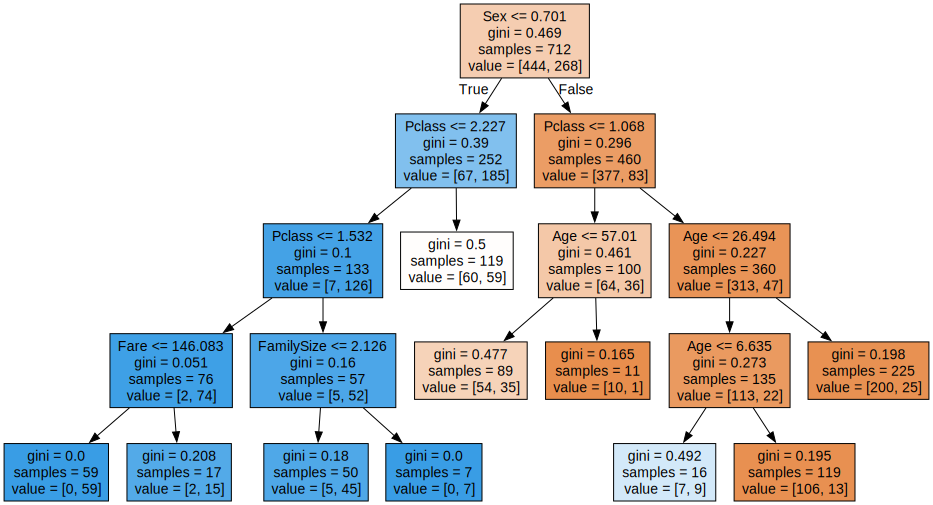

In [3]:
#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

import graphviz
dot_data= tree.export_graphviz(dtree, out_file=None,feature_names=x_train.columns,
                                filled=True)
graph = graphviz.Source(dot_data)
graph.render('data')
graph

In [4]:
#3. Change the decision tree parameters(at least two parameters).

x1=data[['Sex','Fare','Pclass','PassengerId','Parch']]
y1= data["Survived"]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20,random_state=10)

In [5]:
#4. Calculate the new accuracy and compare it with the previous results. 

dtree1= tree.DecisionTreeClassifier(criterion ='gini',splitter = 'random', max_leaf_nodes=10, min_samples_leaf=5,max_depth=5)
dtree1.fit(x1_train, y1_train)
y1_pred=dtree1.predict(x1_test)
print("score1:{}".format(accuracy_score(y1_test, y1_pred)))

score1:0.770949720670391


It's obvious that the first model is more aaccurate than the second one (score > score1)

In [7]:
#5. Use a random forest then change the number of estimators.
#6. Calculate the new accuracy and compare it with the previous result.

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x3=data[['Sex','Age','Pclass','FamilySize','Fare']]
y3= data["Survived"]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.20,random_state=10)

clf=RandomForestClassifier(n_estimators=10)
clf.fit(x3_train, y3_train)
y3_pred=clf.predict(x3_test)
print("Accuracy:", metrics.accuracy_score(y3_test, y3_pred))

Accuracy: 0.8379888268156425


The Random Forest model exhibits greater accuracy compared to the conventional Decision Tree model.